# **<span style="color:red">Midterm 1 Solutions</span>**

## FINM 36700 - 2024

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

# Instructions

## Please note the following:

Points
* The exam is `100` points.
* You have `125` minutes to complete the exam.
* For every minute late you submit the exam, you will lose one point.


Submission
* You will upload your solution to the `Midterm 1` assignment on Canvas, where you downloaded this. (Be sure to **submit** on Canvas, not just **save** on Canvas.
* Your submission should be readable, (the graders can understand your answers,)
* and it should **include all code used in your analysis in a file format that the code can be executed.** 

Rules
* The exam is open-material, closed-communication.
* You do not need to cite material from the course github repo--you are welcome to use the code posted there without citation.

Advice
* If you find any question to be unclear, state your interpretation and proceed. We will only answer questions of interpretation if there is a typo, error, etc.
* The exam will be graded for partial credit.

## Data

**All data files are found in the class github repo, in the `data` folder.**

This exam makes use of the following data files:
* `midterm_1_data.xlsx`

This file has sheets for...
* `stocks excess returns` - excess returns of the 14 biggest companies in the S&P.
* `proshares excess returns` - excess returns of ETFs and indexes from the Proshares case study.
* `fx carry returns` - excess returns from FX products.

Note the data is **monthly** for the first two sheets (stocks and proshares). Any annualizations for those two sheets should use `12` months in a year.

## Scoring

| Problem | Points |
|---------|--------|
| 1       | 15     |
| 2       | 25     |
| 3       | 35     |
| 4       | 25     |

### Each numbered question is worth 5 points unless otherwise specified.

***

# 1. Short Answer

#### No Data Needed

These problems do not require any data file. Rather, analyze them conceptually. 

### 1.

#### (10pts)

In the mean-variance optimization of `homework 1`, suppose we found the mean excess return of TIPS is 4% annualized.

Explain--conceptually--how each of the following would have impacted the new (with TIPS) MV solution.
* TIPS is found to have correlation of 0% to `IEF` and 0% to SPY.
* TIPS is found to have correlation of 100% to `IEF`.

Would it be possible for TIPS to have been found to have 0% correlation to every other asset in `homework 1`? Explain.

### 2. 

Depending on the application, one may or may not choose to include an intercept term in a linear factor decomposition of an asset’s returns. In what circumstances would I prefer to include an intercept, and in what circumstances would I not?

***

# <span style="color:red">Solution 1</span>

### <span style="color:red">1.1.</span>

**TIPS is found to have correlation of 0% to `IEF` and 0% to `SPY`:**

If restricted to a long-only portfolios, correlation of 0% would for sure increase TIPS diversification characteristic and therefore increase its weight in the GMV and tangency portfolio. In a long-only portfolio, lower correlation with other assets, higher expected return, and lower volatility (the last two are directly related to Sharpe) are the main estimates responsible for defining (and more specifically increasing) weights in optimal MV portfolios. In summary, by lowering TIPS correlation with SPY and IEF we can ensure bigger absolute value of Sharpe in the tangency portfolio.

In the case study as well as in our homework (even though we are not restricted to long-only portfolio), TIPS, IEF and SPY present positive weights, which leads us to conclude that a decrease in TIP correlation with the specified other assets should improve the MV allocation and increase the set of risk-return possible allocations.

Extra:

In some cases, if not restricted to long-only portfolios, the expected output is not straight-forward. For instance, if TIPS currently had negative weights in the tangency portfolio, decreasing its correlation with other assets to 0% (all else constant) would decrease its diversification benefit (shorting an asset with highly positive correlation is equal to buying an asset with highly negative correlation). The result could also be detrimental even if TIPS has positive weight but IEF and SPY have negative weights in the tangency portfolio, since the change would reduce the diversification benefit of IEF and SPY.

**TIPS is found to have correlation of 100% to `IEF`:**

If TIPS had a correlation of 100% with IEF, the covariance matrix would not be invertible, not allowing for a analytical solution when deriving the tangency and GMV portfolios. The theoretical solution, in the limit, would tell you to infinitely short the asset with the lowest Sharpe between the two to infinitely buy the asset with the highest Sharpe. In the tangency portfolio constrained optimization, the solution would put IEF weight in its lower bound (considering that it has lower Sharpe than TIPS) and TIPS on its upper bound.

**Would it be possible for TIPS to have been found to have 0% correlation to every other asset in `homework 1`? Explain.**

Yes, it is mathematically possible. In such a case, TIPS would have the highest diversification benefit and we should expect the tangency portfolio and the GMV portfolio to allocate relevant weight to it.

Curiosity:

In this scenario, running the optimization with all the other assets but TIPS and creating a portfolio which would later be optimized with TIPS would yield the same result as optimizing the solution with all the assets (including TIPS) directly.

### <span style="color:red">1.2.</span>

Performance evaluation: always include the intercept.

Hedging and Tracking:

- Include when:
    - I don't trust the estimation of my target asset mean return.
    - I want to hedge/track the variation of my asset's return.

- Exclude when:
    - I trust my estimation of my target asset mean return.
    - I want the betas (positions) to correct for the expected difference in level (mean return).
    - I want to hedge/track my asset's total returns and I am also using regressors total returns.

***

# 2. Portfolio Allocation

For this question you will only use data from the sheet `stocks excess returns`.

It contains excess returns for the 14 largest stocks in the S&P.

### 1.

Calculate the tangency portfolio from the start of the sample to December of 2018 (to 2018-12-31), which we call in-sample period. Use the following methods:
- Traditional tangency portfolio.
- Regularized tangency portfolio (divide by 2 every element outside of the diagonal in the covariance matrix prior to the calculation).

Return:
- The weights of each asset for the traditional tangency portfolio and the regularized tangency portfolio.
- The sum of absolute values of the weights for the traditional tangency portfolio and the regularized tangency portfolio:

$$
\sum_{i=1}^{n} |w_i|
$$


### 2.

Calculate the annualized summary statistics (mean, Sharpe, vol) of both portfolios in-sample.


### 3.

Use the weights calculated in question (2.2) to produce portfolio returns out-of-sample for both the Traditional and Regularized portfolio (from January 2019 onwards). 

Report the **last 3 returns** of both portfolios in the out-of-sample (the traditional tangency portfolio and the regularized tangency portfolio).

### 4.

Report the annualized summary statistics (Mean, Vol and Sharpe) of both portfolios in the out-of-sample.

Note: you are using the weights optimized for the in-sample and generating statistics with the out-of-sample returns.

### 5.
Which portfolio has better adjusted by risk returns in the out-of-sample? Could there be a mathematical/optimization reason why one portfolio had better adjusted by risk performance? 

Relate your answer to your findings in question (2.2) (Sum of absolute weights in the traditional and regularized tangency portfolio.)

***

# <span style="color:red">Solution 2</span>

In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re

In [8]:
import sys
sys.path.insert(0,'../cmds')
import portfolio_management_helper as pmh

In [9]:
FILEIN = "../data/midterm_1_data_cleaned.xlsx"
SHEET = "stocks excess returns"

excess_returns = pd.read_excel(FILEIN, sheet_name=SHEET).set_index('date')

### <span style="color:red">2.1.</span>

In [4]:
LAST_IN_SAMPLE_YEAR = "2018"
FIRST_OUT_OF_SAMPLE_YEAR = f"{(int(LAST_IN_SAMPLE_YEAR) + 1):.0f}"
COV_MATRIX = .5

excess_returns_in_sample = excess_returns.loc[:LAST_IN_SAMPLE_YEAR]
excess_returns_out_of_sample = excess_returns.loc[FIRST_OUT_OF_SAMPLE_YEAR:]

In [5]:
pd.concat([
    pmh.calc_tangency_weights(excess_returns_in_sample),
    pmh.calc_tangency_weights(excess_returns_in_sample, cov_mat=.5)
], axis=1)

,Tangency Weights,Tangency Regularized 0.50 Weights
AAPL,-0.1278,-0.0147
AMZN,-0.0406,0.0363
BRK-B,0.1313,0.1092
GOOGL,0.0260,0.0505
JNJ,0.1304,0.0992
JPM,-0.0139,0.0537
LLY,0.3527,0.2149
META,0.0305,0.0349
MSFT,0.1379,0.0900
NVDA,0.1635,0.0717


In [6]:
(
    pd.concat([
        pmh.calc_tangency_weights(excess_returns_in_sample),
        pmh.calc_tangency_weights(excess_returns_in_sample, cov_mat=COV_MATRIX, name="Regularized")
    ], axis=1)
    .abs()
    .sum(axis=0)
    .to_frame("Sum of Absolute Weights")
)

,Sum of Absolute Weights
Tangency Weights,2.1977
Regularized Weights,1.3426


### <span style="color:red">2.2.</span>

In [7]:
pmh.calc_summary_statistics(
    pd.concat([
        pmh.calc_tangency_weights(excess_returns_in_sample, return_port_ret=True),
        pmh.calc_tangency_weights(excess_returns_in_sample, cov_mat=COV_MATRIX, return_port_ret=True)
    ], axis=1),
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"],
    annual_factor=12,
    provided_excess_returns=True
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,0.3483,0.1341,2.5979
Tangency Regularized 0.50 Portfolio,0.2766,0.1142,2.4224


### <span style="color:red">2.3.</span>

In [8]:
tangency_portfolio_out_of_sample = pmh.create_portfolio(
    excess_returns_out_of_sample,
    pmh.calc_tangency_weights(excess_returns_in_sample).iloc[:, 0].to_dict(),
    port_name="Tangency Portfolio"
)
regularized_portfolio_out_of_sample = pmh.create_portfolio(
    excess_returns_out_of_sample,
    pmh.calc_tangency_weights(excess_returns_in_sample, cov_mat=COV_MATRIX).iloc[:, 0].to_dict(),
    port_name="Regularized Portfolio"
)
portfolios_out_of_sample = pd.concat(
    [tangency_portfolio_out_of_sample, regularized_portfolio_out_of_sample],
    axis=1
)
portfolios_out_of_sample.tail(3)

,Tangency Portfolio,Regularized Portfolio
date,,
2024-07-31,-0.0160,0.0032
2024-08-31,0.1012,0.0646
2024-09-30,-0.0252,-0.0165


### <span style="color:red">2.4.</span>

In [9]:
(
    pmh.calc_summary_statistics(
        portfolios_out_of_sample,
        keep_columns=[
            "Annualized Mean", "Annualized Vol", "Annualized Sharpe",
        ],
        annual_factor=12,
        provided_excess_returns=True
    )
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Tangency Portfolio,0.3216,0.2224,1.4462
Regularized Portfolio,0.2687,0.1763,1.5237


### <span style="color:red">2.5.</span>

In the out-of-sample, the regularized portfolio performs better when compared to the traditional tangency portfolio. With regularization, we reduce the covariances between assets, making the optimization more stable. As a consequence, it is less prone to "overfit" the data in the in-sample.

On the other hand, for the traditional tangency portfolio, the optimization presents more unstable covariance matrix, leading to extreme allocations, as we can see in the results provided in (2.2). Furthermore, the traditional approach is way more sensitive to changes in input data. Since $\Sigma$ has a small determinant, small changes in the input, generates big changes in the allocation. In other words, the traditional tangency portfolio highly optimizes for in-sample, but is far from the optimal result out-of-sample, which can be highly different due to small changes in returns, variance and covariances in this new period.

***

# 3. Hedging and Replication

For this question you will only use data from the sheet `proshares excess returns`.

The following assets excess returns are available in this sheet:

- **HDG US Equity**: ProShares Hedge Replication ET
- **QAI US Equity**: NYLI Hedge Multi-Strategy Trac
- **SPY US Equity**: SPDR S&P 500 ETF Trust
- **EEM US Equity**: iShares MSCI Emerging Markets
- **EFA US Equity**: iShares MSCI EAFE ETF
- **EUO US Equity**: ProShares UltraShort Euro
- **IWM US Equity**: iShares Russell 2000 ETF
- **SPXU US Equity**: ProShares UltraPro Short S&P 5
- **UPRO US Equity**: ProShares UltraPro S&P 500

### 1. 

You work at a hedge fund.

Suppose the hedge fund is long $1 million of HDG and wants to hedge the position.

A junior analyst suggests that we can hedge our position by looking at some select ETFs, and then taking a position in the ETFs that will offset the risk of our HDG position.

They pick QAI, SPY, EEM, UPRO, SPXU, IWM, and EFA.

What dollar position would we be taking in each ETF to hedge your HDG position?

### 2.

#### (7pts)
What is the gross notional of the hedge?

What is the R-squared of the hedge?

What do these two statistics indicate about the practical use of this hedge?

### 3.

Suppose instead we don't want to hedge our position. We believe that the value of HDG can be *entirely* determined by some combination of the other ETFs. 

So, you propose the following model:

$$
HDG_t = \beta_1 QAI_t + \beta_2 SPY_t + \beta_3 EEM_t + \varepsilon_t
$$

We think any difference between the value of HDG and the value of the ETFs is a mispricing, and will revert to 0 in the future. We call such a strategy "trading the residuals".

Therefore, if $\varepsilon_t > 0$, we should be short HDG and long the basket, and if $\varepsilon_t < 0$, we should be long HDG and short the basket.

Now...
* Run the model specified above and report the $\beta$'s values.
* After, create the "basket" portfolio, using the $\beta$'s as weights (they do not need to add up to one). Report the final three values of the timeseries of your constructed portfolio.

### 4.

#### (8pts)

Construct the strategy indicated by the approach in the previous problem.

For a given period $t$:
- if the $\varepsilon_t \leq 0$ (is negative or equal to 0), you should be long HDG 200% in HDG and short 100% in the basket portfolio **in period $t+1$**.
- if the $\varepsilon_t > 0$ (is positive), you should be long 200% in the basket portfolio and short 100% **in HDG in period $t+1$**.

Do not worry about the look forward bias: in this scenario, you should run the model only once with the entire dataset and define your $\varepsilon_t$ for any $t$ also considering the model that has acess to data in $t+1, t+2, ...$ to make the calculation.  

Report the annualized summary statistics of this strategy (Mean, Vol and Sharpe).

### 5.

On a different matter, we are now studying QAI and want to track (replicate) it using the other available ETFs. 
* (Clarification: That is, use all the ETFs except QAI as replicating instruments, including HDG as a replicating instrument.)

Use an intercept and report:

- $\beta$ (and the sum of $\beta$'s absolute value).
- $\alpha$ and Information Ratio.
- $R^2$.
- Correlation matrix between the assets used to replicate QAI.

### 6.

Explain how good is your replication, pointing out at least one good or bad argument related to each of the statistics mentioned in the bullet points above (thus, you should have at least 4 arguments).

***

# <span style="color:red">Solution 3</span>

In [10]:
SHEET = "proshares excess returns"
combined = pd.read_excel(FILEIN, sheet_name=SHEET).set_index('date')

### <span style="color:red">3.1.</span>

In [11]:
import statsmodels.api as sm

# HDG US Equity is the independent variable
Y = combined['HDG US Equity']
# The rest of the columns are the dependent variables
X = combined[['QAI US Equity', 'SPY US Equity', 'EEM US Equity', 'UPRO US Equity', 'SPXU US Equity', 'IWM US Equity',
            'EFA US Equity']]

# Suppose we want to replicate the performance of HDG US Equity using the other ETFs.
# What are the weights we should assign to each ETF?
model = sm.OLS(Y, X)
results = model.fit()
results.params * 1_000_000 * -1

QAI US Equity    -166,628.9443
SPY US Equity    -240,419.3102
EEM US Equity     -44,877.0281
UPRO US Equity     69,393.2405
SPXU US Equity    -16,065.4799
IWM US Equity    -139,894.4199
EFA US Equity    -120,176.8539
dtype: float64

### <span style="color:red">3.2.</span>

In [12]:
print(f"${results.params.abs().sum() * 1_000_000:,.0f}")

$797,455


In [13]:
print(f"{results.rsquared:.3f}")

0.912


### <span style="color:red">3.3.</span>

In [14]:
# # Only use QAI, SPY, and EEM
X = combined[['QAI US Equity', 'SPY US Equity', 'EEM US Equity']]
trading_residuals_model = sm.OLS(Y, X).fit()
betas = trading_residuals_model.params
betas

QAI US Equity   0.3564
SPY US Equity   0.1627
EEM US Equity   0.0865
dtype: float64

In [15]:
basket_portfolio = pmh.create_portfolio(
    combined[['QAI US Equity', 'SPY US Equity', 'EEM US Equity']], weights=betas.to_dict(), port_name="Basket Portfolio"
)

### <span style="color:red">3.4.</span>

In [16]:
residuals = Y - X @ betas
strategy = (
    residuals
    .to_frame("Residuals")
    .join(basket_portfolio, how="outer")
    .join(combined[['HDG US Equity']], how="outer")
    .assign(Residuals=lambda df: df['Residuals'].shift())
    .assign(Strategy=lambda df: np.select(
        condlist=[df["Residuals"] > 0, True],
        choicelist=[
            df["HDG US Equity"] * 2 - df["Basket Portfolio"] * 1,
            df["Basket Portfolio"] * 2 - df["HDG US Equity"] * 1,
        ]
    ))
)


In [17]:
strategy_shift_other = (
    residuals
    .to_frame("Residuals")
    .join(basket_portfolio, how="outer")
    .join(combined[['HDG US Equity']], how="outer")
    .assign(Residuals=lambda df: df['Residuals'])
    .assign(Strategy=lambda df: np.select(
        condlist=[df["Residuals"] > 0, True],
        choicelist=[
            df["HDG US Equity"].shift(-1) * 2 - df["Basket Portfolio"].shift(-1) * 1,
            df["Basket Portfolio"].shift(-1) * 2 - df["HDG US Equity"].shift(-1) * 1,
        ]
    ))
)


In [18]:
pmh.calc_summary_statistics(
    strategy,
    provided_excess_returns=True,
    annual_factor=12,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"],
    drop_indexes=["Residuals"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Basket Portfolio,0.0355,0.0531,0.6675
HDG US Equity,0.0248,0.0584,0.4248
Strategy,0.0263,0.0665,0.3962


In [19]:
pmh.calc_summary_statistics(
    strategy_shift_other,
    provided_excess_returns=True,
    annual_factor=12,
    keep_columns=["Annualized Mean", "Annualized Vol", "Annualized Sharpe"],
    drop_indexes=["Residuals"]
)

,Annualized Mean,Annualized Vol,Annualized Sharpe
Basket Portfolio,0.0355,0.0531,0.6675
HDG US Equity,0.0248,0.0584,0.4248
Strategy,0.0274,0.0666,0.4112


### <span style="color:red">3.5.</span>

The highest correlation (99.65%) is between UPRO US Equity and SPY US Equity
The lowest correlation (-95.55%) is between SPY US Equity and SPXU US Equity


<AxesSubplot:>

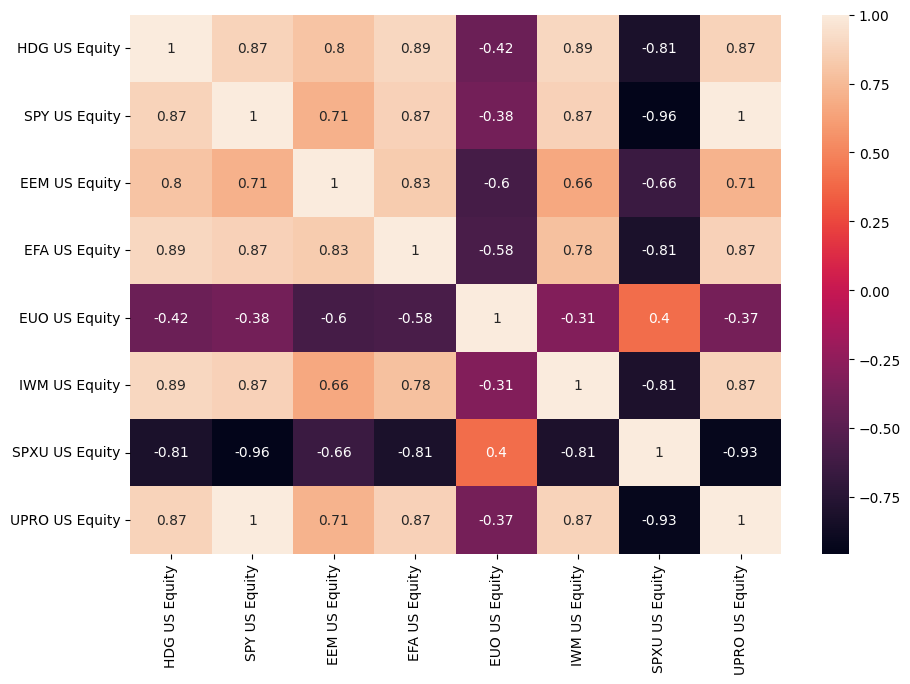

In [20]:
# This question was not explicit in which ETFs to include. 2 possible answers are provided.
X_replicate = combined.loc[:, ~combined.columns.isin(['QAI US Equity'])]
Y = combined[['QAI US Equity']]
pmh.calc_correlations(X_replicate)

In [21]:
qai_tracking_regression = pmh.calc_regression(
    Y, X_replicate,
    annual_factor=12,
    keep_columns=['Alpha', 'Beta', 'Information Ratio', 'R-Squared'],
    warnings=False
)
qai_tracking_regression.transpose()

,QAI US Equity
Alpha,-0.0005
Annualized Alpha,-0.0063
R-Squared,0.8420
HDG US Equity Beta,0.2315
SPY US Equity Beta,0.5651
EEM US Equity Beta,0.0478
EFA US Equity Beta,0.0326
EUO US Equity Beta,-0.0205
IWM US Equity Beta,-0.0002
SPXU US Equity Beta,0.0511


In [22]:
qai_tracking_betas = pmh.calc_regression(Y, X_replicate, annual_factor=12, keep_columns=['Beta'], warnings=False)
print(f"Sum of Betas: {qai_tracking_betas.abs().sum(axis=1).values[0]:.2f}")

Sum of Betas: 1.04


The highest correlation (99.65%) is between UPRO US Equity and SPY US Equity
The lowest correlation (-95.55%) is between SPXU US Equity and SPY US Equity
Sum of Betas: 1.05


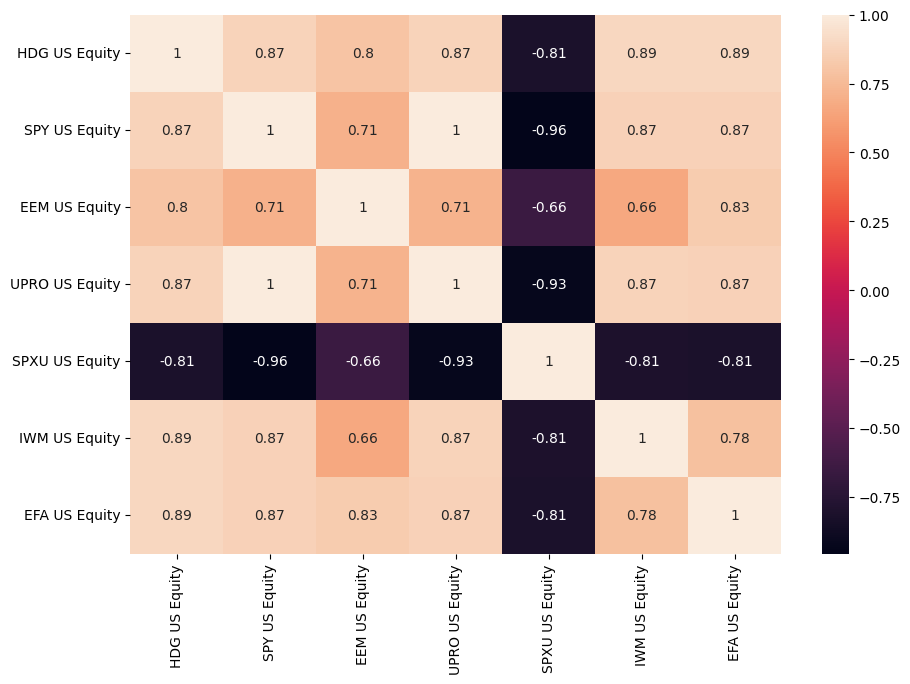

In [27]:
X_replicate = combined[['HDG US Equity', 'SPY US Equity', 'EEM US Equity', 'UPRO US Equity', 'SPXU US Equity', 'IWM US Equity',
            'EFA US Equity']]
pmh.calc_correlations(X_replicate)
qai_tracking_betas = pmh.calc_regression(Y, X_replicate, annual_factor=12, keep_columns=['Beta'], warnings=False)
print(f"Sum of Betas: {qai_tracking_betas.abs().sum(axis=1).values[0]:.2f}")

In [28]:
qai_tracking_regression = pmh.calc_regression(
    Y, X_replicate,
    annual_factor=12,
    keep_columns=['Alpha', 'Beta', 'Information Ratio', 'R-Squared'],
    warnings=False
)
qai_tracking_regression.transpose()

,QAI US Equity
Alpha,-0.0007
Annualized Alpha,-0.0083
R-Squared,0.8400
HDG US Equity Beta,0.2040
SPY US Equity Beta,0.5835
EEM US Equity Beta,0.0563
UPRO US Equity Beta,-0.1049
SPXU US Equity Beta,0.0491
IWM US Equity Beta,0.0006
EFA US Equity Beta,0.0500


### <span style="color:red">3.6.</span>


- $\beta$'s: The sum of betas is reasonable. In total, we do not require extreme exposure to other assets to replicate QAI.
- $\alpha$: Alpha is close to zero (with low IR), which highlights that there is no mean return of QAI which cannot be tracked by those other assets. We can more easily reject that there will be a difference in mean return in the out-of-sample between QAI and the replication, which would allow us to better replicate it.
- $R^2$: the R-Squared is big, which highlights that we are able to capture the variance of QAI with the available ETFs.
- Correlation matrix: the correlation matrix has big correlation between assets, which can be viewed as a considerable disadvantage. Therefore, we have the problem of high collinearity. In such case, small changes in data in the out-of-sample provide considerable changes in what would be the optimal replication. 


***

# 4. 

The data in sheet `fx carry excess returns` has **excess** daily returns for trading currencies.
* You **do NOT need** to know anything about FX, currency, or the underlying strategies.
* Rather, just take these return series as given.

For the problems below, we will **only use** the `JPY` series.

### 1.

Calculate the `1%` VaR as follows...

Empirical VaR:
* At every point in time, calculate the `1st` quantile of the returns up to that point.
* No need to scale the answers.
  
Report the VaR for the final date of the sample.

### 2.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* rolling volatility.
* using a window of `233` days.
* without using a sample mean.

Report the VaR for the final `3 days` of the sample.

### 3.

Now calculate the `normal VaR` of `JPY` as follows,

$$\text{Normal VaR (1\%)} = -2.33\, \sigma_t$$

where $\sigma_t$ is estimated with
* EWMA volatility
* using $\lambda = 0.94$.
* without using a sample mean.

Note that...
* You can calculate the EWMA vol directly from the info above (per the lecture.)
* If you prefer the recursive formula, go ahead with $\sigma_0 = 0.005$ (Note that this quoted value is already scaled for daily returns, so no rescaling is needed.)

Report the VaR for the final `3 days` of the sample.

### 4.

Make a plot of the three timeseries of your VaR estimates.

Succinctly point out the pros / cons of these approaches.

### 5.

What statistic do we use to judge the performance of a VaR model?

Estimate and report this statistic across the VaR methods.

Which VaR model do you find is best?

***

# <span style="color:red">Solution 4</span>

In [10]:
from scipy.optimize import minimize

In [13]:
SHEET = 'fx carry returns'
rx = pd.read_excel(FILEIN, sheet_name=SHEET).set_index('date')

TICK = 'JPY'
QUANTILE = .01
jpy = rx[[TICK]]

DAYS_FX = 233

### <span style="color:red">4.1.</span>

In [14]:
pmh.calc_var_cvar_summary(
    jpy,
    quantile=QUANTILE
)

Using "window" of 60 periods, since none was specified


/opt/homebrew/anaconda3/envs/finm/lib/python3.12/site-packages/arch/univariate/base.py:766: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


VaR and CVaR are given shifted by 1.000000 period(s).


,Returns,Expanding 60 Historical VaR (1.00%),Rolling 60 Historical VaR (1.00%),Expanding 60 Volatility,Rolling 60 Volatility,EWMA 0.94 Volatility,"GARCH(1, 1) Volatility",Expanding 60 Parametric VaR (1.00%),Rolling 60 Parametric VaR (1.00%),EWMA 0.94 Parametric VaR (1.00%),"GARCH(1, 1) Parametric VaR (1.00%)",Expanding 60 Historical CVaR (1.00%),Rolling 60 Historical CVaR (1.00%),Expanding 60 Parametrical CVaR (1.00%),Rolling 60 Parametrical CVaR (1.00%),EWMA 0.94 Parametrical CVaR (1.00%),"GARCH(1, 1) Parametrical CVaR (1.00%)"
date,,,,,,,,,,,,,,,,,
2019-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-08,-0.0018,NaN,NaN,NaN,NaN,0.0122,0.0029,NaN,NaN,-0.0284,-0.0068,NaN,NaN,NaN,NaN,-0.0326,-0.0078
2019-01-09,-0.0003,NaN,NaN,NaN,NaN,0.0119,0.1103,NaN,NaN,-0.0276,-0.2566,NaN,NaN,NaN,NaN,-0.0316,-0.2939
2019-01-10,0.0052,NaN,NaN,NaN,NaN,0.0116,0.1508,NaN,NaN,-0.0269,-0.3509,NaN,NaN,NaN,NaN,-0.0308,-0.4020
2019-01-11,-0.0025,NaN,NaN,NaN,NaN,0.0112,0.1780,NaN,NaN,-0.0261,-0.4141,NaN,NaN,NaN,NaN,-0.0299,-0.4745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-30,-0.0019,-0.0172,-0.0118,0.0057,0.0062,0.0063,0.3142,-0.0133,-0.0144,-0.0146,-0.7309,-0.0217,-0.0172,-0.0153,-0.0164,-0.0168,-0.8374
2024-07-31,0.0079,-0.0172,-0.0076,0.0057,0.0058,0.0064,0.3147,-0.0133,-0.0136,-0.0149,-0.7321,-0.0217,-0.0080,-0.0153,-0.0156,-0.0171,-0.8387
2024-08-01,0.0183,-0.0172,-0.0076,0.0057,0.0063,0.0076,0.3140,-0.0134,-0.0146,-0.0178,-0.7306,-0.0214,-0.0080,-0.0153,-0.0168,-0.0204,-0.8370


### <span style="color:red">4.2.</span>

In [25]:
ZSCORE = -2.33

WINDOW = round(DAYS_FX)

rx_strategy = rx.copy()[[TICK]]

risk = pd.DataFrame(index=rx_strategy.index,dtype=float)
risk['VaR empirical'] = rx_strategy.expanding(WINDOW).quantile(QUANTILE)
risk['VaR normal'] = ZSCORE * rx_strategy.rolling(WINDOW).std()

risk.tail().style.format('{:.2%}').format_index('{:%Y-%m-%d}')

,VaR empirical,VaR normal
date,,
2024-07-30,-1.72%,-1.31%
2024-07-31,-1.72%,-1.33%
2024-08-01,-1.72%,-1.34%
2024-08-02,-1.72%,-1.36%
2024-08-05,-1.72%,-1.38%


### <span style="color:red">4.3.</span>

### <span style="color:red">4.4.</span>

### <span style="color:red">4.5.</span>

In [26]:
flagVaR = rx_strategy.values < risk.shift()
(flagVaR.sum() / flagVaR.shape[0]).to_frame().rename(columns={0:'hit ratio'}).style.format('{:.2%}')

,hit ratio
VaR empirical,1.69%
VaR normal,2.07%
